In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
data['Species'].replace(to_replace = ['setosa', 'versicolor', 'virginica'], value = [0, 1, 2], inplace = True)

In [7]:
data.head(80)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
77,6.7,3.0,5.0,1.7,1
78,6.0,2.9,4.5,1.5,1


In [8]:
X = data.iloc[:,:-1]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
Y = data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [12]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [13]:
y_train

32     0
52     1
70     1
121    2
144    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: Species, Length: 105, dtype: int64

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [16]:
y_train.unique()

array([0, 1, 2])

In [17]:
kmeans.labels_

array([1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0,
       0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[6.81034483, 3.0862069 , 5.67931034, 2.03448276],
       [5.04722222, 3.48055556, 1.46388889, 0.23611111],
       [5.8575    , 2.73      , 4.34      , 1.4175    ]])

In [19]:
predicted = kmeans.predict(X_test)
predicted

array([2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1,
       2], dtype=int32)

In [20]:
mean_distance = np.array(kmeans.fit_transform(X_test))
mean_distance

array([[0.61816787, 3.55867007, 1.92286245],
       [1.03933958, 4.474514  , 0.87943163],
       [3.41394034, 0.65015697, 5.02288762],
       [0.32106682, 3.56047606, 1.66415144],
       [3.50105264, 0.13571429, 5.2122356 ],
       [1.62223775, 2.5269668 , 3.41136336],
       [0.61623905, 3.99390479, 1.40833235],
       [0.6200907 , 2.94567306, 2.38859792],
       [3.40472194, 0.24169892, 5.09582182],
       [0.28989012, 3.34661724, 2.02469751],
       [0.41142967, 3.3681052 , 2.00534286],
       [0.76981018, 4.13329562, 1.44131884],
       [0.81254339, 2.97822883, 2.5925663 ],
       [3.49588031, 0.30681045, 5.24532173],
       [3.46688252, 0.54758281, 5.10248959],
       [1.49912295, 4.83571429, 0.37067506],
       [0.65555363, 3.49936583, 1.75653067],
       [3.75908273, 0.60461659, 5.54413203],
       [3.40563092, 0.4734265 , 5.05404788],
       [3.66498725, 0.29974479, 5.3791635 ],
       [1.9577047 , 5.29229802, 0.15297059],
       [1.41748876, 4.83482794, 0.67483331],
       [0.

In [21]:
np.shape(mean_distance)

(45, 3)

In [22]:
mean_distance.mean(0)

array([1.82196887, 2.92297942, 2.6581419 ])

In [23]:
mean_distance.mean()

2.467696730058967

In [24]:
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    elbow_prediction = kmeans.labels_
    print(elbow_prediction)
    sse[k] = kmeans.inertia_
print(sse)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

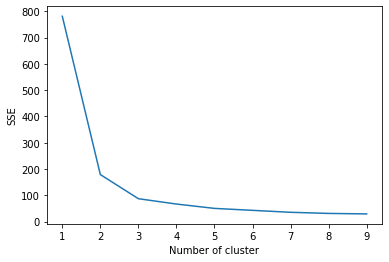

In [25]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

So optimal number of clusters should be around 3.

Can't found Canonical Discriminant Analysis, Linear Discriminant Analysis was avaiable.